In [1]:
# plotting libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from pathlib import Path

# auxiliary functions
import s3ts.analysis as aux

In [2]:
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='medium')
# plt.rc('ytick', labelsize='medium')

In [3]:
df = aux.load_data(Path("../results_synced/stride/"))
#df["target_best_model"].str.split("/").str[5].str[6:].str.split("-").str[0]
df

,dataset,arch,pretrained,fold_number,random_state,batch_size,window_length,window_stride,target_val_acc,target_val_f1,...,target_test_auroc,target_best_model,target_train_csv,nsamp_tra,nsamp_pre,nsamp_test,pretrain_val_mse,pretrain_val_r2,pretrain_best_model,pretrain_train_csv
0,Trace,ResNet_DFS,False,1,0,128,5,1,0.374479,0.374479,...,0.592358,training/EXP_stride_f1.0_base_2023-03-16_13-39...,training/EXP_stride_f1.0_base_2023-03-16_13-39...,11260,0,10985,NaN,NaN,NaN,NaN
1,Trace,ResNet_DFS,True,1,0,128,5,1,0.462240,0.462240,...,0.642303,training/EXP_stride_f1.0_2023-03-16_15-42/logs...,training/EXP_stride_f1.0_2023-03-16_15-42/logs...,11260,33260,10985,0.284317,0.919347,training/EXP_stride_f1.0_2023-03-16_15-42/logs...,training/EXP_stride_f1.0_2023-03-16_15-42/logs...
2,Trace,ResNet_DFS,False,1,0,128,5,2,0.460417,0.460417,...,0.712984,training/EXP_stride_f1.1_base_2023-03-16_20-46...,training/EXP_stride_f1.1_base_2023-03-16_20-46...,11245,0,10970,NaN,NaN,NaN,NaN
3,Trace,ResNet_DFS,True,1,0,128,5,2,0.370573,0.370573,...,0.624086,training/EXP_stride_f1.1_2023-03-16_22-52/logs...,training/EXP_stride_f1.1_2023-03-16_22-52/logs...,11245,33245,10970,0.295644,0.912795,training/EXP_stride_f1.1_2023-03-16_22-52/logs...,training/EXP_stride_f1.1_2023-03-16_22-52/logs...
4,Trace,ResNet_DFS,False,1,0,128,5,3,0.439844,0.439844,...,0.718032,training/EXP_stride_f1.2_base_2023-03-17_04-04...,training/EXP_stride_f1.2_base_2023-03-17_04-04...,11230,0,10955,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,GunPoint,CNN_DFS,True,3,0,128,5,3,0.600098,0.600098,...,0.787914,training/EXP_stride_f3.2_2023-03-16_15-00/logs...,training/EXP_stride_f3.2_2023-03-16_15-00/logs...,6105,18105,5955,0.109927,0.987760,training/EXP_stride_f3.2_2023-03-16_15-00/logs...,training/EXP_stride_f3.2_2023-03-16_15-00/logs...
576,GunPoint,CNN_DFS,False,3,0,128,5,4,0.692383,0.692383,...,0.803429,training/EXP_stride_f3.3_base_2023-03-16_15-23...,training/EXP_stride_f3.3_base_2023-03-16_15-23...,6090,0,5940,NaN,NaN,NaN,NaN
577,GunPoint,CNN_DFS,True,3,0,128,5,4,0.674805,0.674805,...,0.827920,training/EXP_stride_f3.3_2023-03-16_15-34/logs...,training/EXP_stride_f3.3_2023-03-16_15-34/logs...,6090,18090,5940,0.116305,0.986318,training/EXP_stride_f3.3_2023-03-16_15-34/logs...,training/EXP_stride_f3.3_2023-03-16_15-34/logs...
578,GunPoint,CNN_DFS,False,3,0,128,5,5,0.664551,0.664551,...,0.823156,training/EXP_stride_f3.4_base_2023-03-16_15-58...,training/EXP_stride_f3.4_base_2023-03-16_15-58...,6075,0,5925,NaN,NaN,NaN,NaN


In [4]:
dfp = df.groupby(["dataset", "arch", "window_stride", "pretrained"])[["target_val_acc", "target_test_acc"]].mean().reset_index()
dfp

,dataset,arch,window_stride,pretrained,target_val_acc,target_test_acc
0,Coffee,CNN_DFS,1,False,0.527500,0.484901
1,Coffee,CNN_DFS,1,True,0.658906,0.564488
2,Coffee,CNN_DFS,2,False,0.536719,0.493414
3,Coffee,CNN_DFS,2,True,0.653438,0.577599
4,Coffee,CNN_DFS,3,False,0.591562,0.528691
...,...,...,...,...,...,...
112,Trace,ResNet_DFS,2,False,0.452188,0.438842
113,Trace,ResNet_DFS,2,True,0.517708,0.446415
114,Trace,ResNet_DFS,3,False,0.451146,0.425809
115,Trace,ResNet_DFS,3,True,0.488281,0.471752


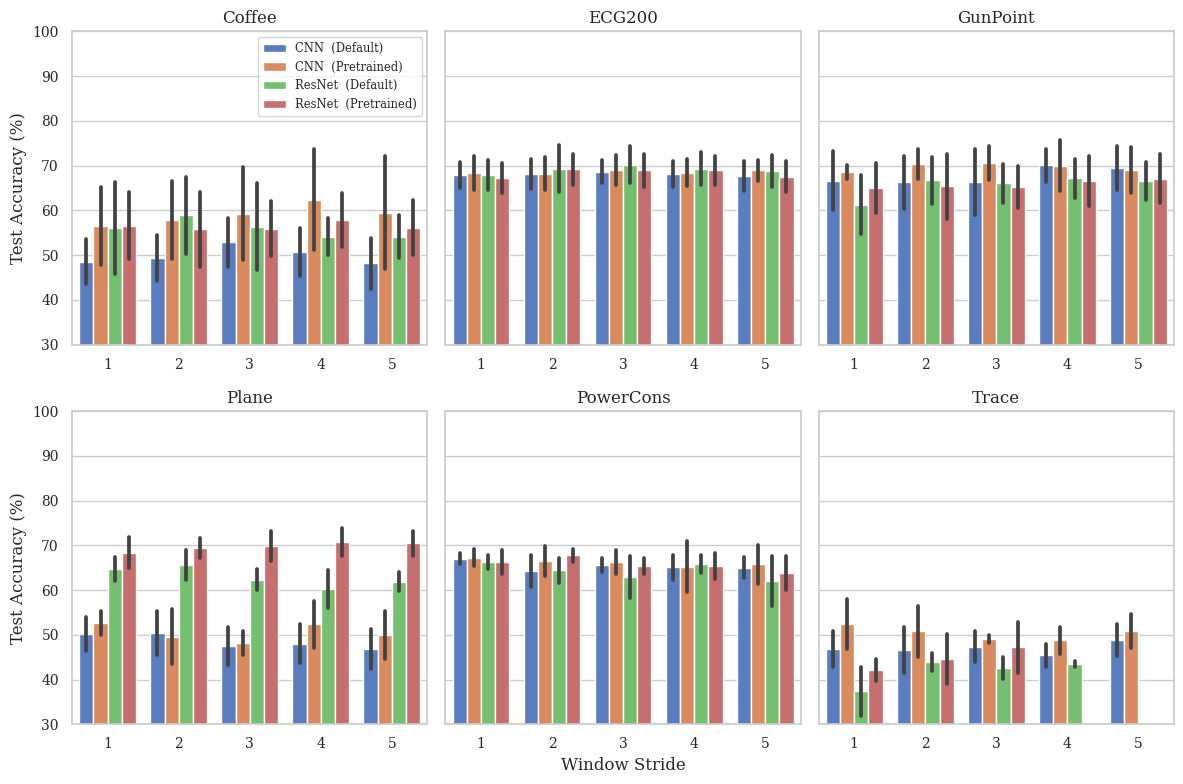

In [5]:
data = df.copy()
data["target_test_acc"] = 100*data["target_test_acc"]
data["xd"] = data["pretrained"].replace({True: "(Pretrained)", False: "(Default)"})
data["arch"] = data["arch"].str.replace("_DFS", " ")
data["hue"] = data["arch"] + " " + data["xd"]
data.sort_values(["hue", "dataset"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
g = sns.catplot(data=data, x="window_stride", y="target_test_acc", hue="hue", col="dataset", #row="arch",# hue="pretrained",
                kind="bar",  height=4, aspect=1, margin_titles=True, legend=False, legend_out=False, palette="muted", #["blue", "green", "orange", "red"],
                errorbar="sd", col_wrap=3, sharex=False, sharey=True, facet_kws={"despine": False, "ylim": (30, 100),
                    "gridspec_kws": {}});

#g.despine()
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Window Stride")
g.add_legend(adjust_subtitles=True, fontsize="x-small")
g.facet_axis(0,2).set_xlabel("")
g.facet_axis(0,3).set_xlabel("")
g.facet_axis(0,5).set_xlabel("");